#### Read file

In [1]:
#  read data from excel file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data= pd.read_excel('20230126 SATS Sep-Oct data with success-bays-actual_time.xlsx', sheet_name='Sheet3',parse_dates=['Actual_Connection_Time'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105700 entries, 0 to 105699
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   ArrivalFlight                105700 non-null  object        
 1   ORIGIN                       105700 non-null  object        
 2   Arrival_Gate                 105700 non-null  object        
 3   SIBTDateTimeOffset           105700 non-null  object        
 4   ArrivalFlight & Date         105700 non-null  object        
 5   ArrFlt_SIBT                  105700 non-null  object        
 6   SIBT                         105700 non-null  datetime64[ns]
 7   Day in Week                  105700 non-null  object        
 8   EIBTDateTimeOffset           105700 non-null  object        
 9   EIBT                         105700 non-null  datetime64[ns]
 10  AIBTDateTimeOffset           105700 non-null  object        
 11  AIBT                      

In [2]:
# missing value
data.isnull().sum()

ArrivalFlight           0
ORIGIN                  0
Arrival_Gate            0
SIBTDateTimeOffset      0
ArrivalFlight & Date    0
                       ..
Missed_CY               0
Missed_IY               0
Missed_Total            0
Missed_Y/N              0
% Success               0
Length: 79, dtype: int64

In [3]:
data.columns

Index(['ArrivalFlight', 'ORIGIN', 'Arrival_Gate', 'SIBTDateTimeOffset',
       'ArrivalFlight & Date', 'ArrFlt_SIBT', 'SIBT', 'Day in Week',
       'EIBTDateTimeOffset', 'EIBT', 'AIBTDateTimeOffset', 'AIBT',
       'DepartureFlight', 'Dep_Gate', 'DepartureFlight & Date', 'DESTINATION',
       'SOBTDateTimeOffset', 'SOBT', 'EOBTDateTimeOffset',
       'Flight_Departure_Time', 'EOBT', 'AOBTDateTimeOffset', 'AOBT',
       'Actual_Connection_Time', 'ID', 'AdultFirstBookedCount',
       'ChildFirstBookedCount', 'InfantFirstBookedCount',
       'AdultBusinessBookedCount', 'ChildBusinessBookedCount',
       'InfantBusinessBookedCount', 'AdultPremiumBookedCount',
       'ChildPremiumBookedCount', 'InfantPremiumBookedCount',
       'AdultEconomyBookedCount', 'ChildEconomyBookedCount',
       'InfantEconomyBookedCount', 'EOBT2', 'ConnectTime (SOBT-SIBT)',
       'ConnectTime (EOBT-EIBT)', 'Duration', 'Protection_Cost',
       'AdultFirstAcceptedCount', 'ChildFirstAcceptedCount',
       'InfantFi

#### Specific Columns

In [4]:
# shortlisted columns
datatemp=data[['ArrivalFlight','ORIGIN','SIBT','DESTINATION','Arrival_Gate','Dep_Gate','Actual_Connection_Time','% Success']]

In [5]:
datatemp.head()

,ArrivalFlight,ORIGIN,SIBT,DESTINATION,Arrival_Gate,Dep_Gate,Actual_Connection_Time,% Success
0,SQ208,Melbourne,2022-09-30 16:15:00,London,B2,A2,2023-02-02 00:34:00,1.0
1,SQ208,Melbourne,2022-09-30 16:15:00,New Dehli,B2,A2,2023-02-02 00:34:00,1.0
2,SQ208,Melbourne,2022-09-30 16:15:00,Manila,B2,A2,2023-02-02 00:34:00,0.0
3,SQ208,Melbourne,2022-09-30 16:15:00,Ahmedabad,B2,A2,2023-02-02 00:34:00,1.0
4,SQ208,Melbourne,2022-09-30 16:15:00,Seoul,B2,A2,2023-02-02 00:34:00,1.0


#### Dtypes and Shape

In [6]:
#  data type
datatemp.dtypes

ArrivalFlight                     object
ORIGIN                            object
SIBT                      datetime64[ns]
DESTINATION                       object
Arrival_Gate                      object
Dep_Gate                          object
Actual_Connection_Time    datetime64[ns]
% Success                        float64
dtype: object

In [7]:
# check number of rows
datatemp.shape

(105700, 8)

#### HH:MM:SS --> Seconds --> Minutes

In [8]:
# convert Actual Connection Time HH:MM:SS to minutes
datatemp['Actual_Connection_Time_new']=datatemp['Actual_Connection_Time'].dt.hour*(60*60)+datatemp['Actual_Connection_Time'].dt.minute*60+datatemp['Actual_Connection_Time'].dt.second
# now convert to minutes
datatemp['Actual_Connection_Time_new']=datatemp['Actual_Connection_Time_new']/60
datatemp.info()

C:\Users\cvalley\AppData\Local\Temp\ipykernel_16836\2689905527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatemp['Actual_Connection_Time_new']=datatemp['Actual_Connection_Time'].dt.hour*(60*60)+datatemp['Actual_Connection_Time'].dt.minute*60+datatemp['Actual_Connection_Time'].dt.second
C:\Users\cvalley\AppData\Local\Temp\ipykernel_16836\2689905527.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatemp['Actual_Connection_Time_new']=datatemp['Actual_Connection_Time_new']/60


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105700 entries, 0 to 105699
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   ArrivalFlight               105700 non-null  object        
 1   ORIGIN                      105700 non-null  object        
 2   SIBT                        105700 non-null  datetime64[ns]
 3   DESTINATION                 105700 non-null  object        
 4   Arrival_Gate                105700 non-null  object        
 5   Dep_Gate                    105700 non-null  object        
 6   Actual_Connection_Time      105700 non-null  datetime64[ns]
 7   % Success                   105700 non-null  float64       
 8   Actual_Connection_Time_new  105700 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 7.3+ MB


#### Count, Time > 60 

In [9]:
# actual connection time greater than 60
datatemp[datatemp['Actual_Connection_Time_new']>60].count()

ArrivalFlight                 101357
ORIGIN                        101357
SIBT                          101357
DESTINATION                   101357
Arrival_Gate                  101357
Dep_Gate                      101357
Actual_Connection_Time        101357
% Success                     101357
Actual_Connection_Time_new    101357
dtype: int64

#### Time < 60 

In [10]:
# delete records with actual connection time less than 60
datatemp=datatemp[datatemp['Actual_Connection_Time_new']<60]
datatemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4103 entries, 0 to 105699
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ArrivalFlight               4103 non-null   object        
 1   ORIGIN                      4103 non-null   object        
 2   SIBT                        4103 non-null   datetime64[ns]
 3   DESTINATION                 4103 non-null   object        
 4   Arrival_Gate                4103 non-null   object        
 5   Dep_Gate                    4103 non-null   object        
 6   Actual_Connection_Time      4103 non-null   datetime64[ns]
 7   % Success                   4103 non-null   float64       
 8   Actual_Connection_Time_new  4103 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 320.5+ KB


In [11]:
datatemp.shape

(4103, 9)

In [12]:
datatemp.head()

,ArrivalFlight,ORIGIN,SIBT,DESTINATION,Arrival_Gate,Dep_Gate,Actual_Connection_Time,% Success,Actual_Connection_Time_new
0,SQ208,Melbourne,2022-09-30 16:15:00,London,B2,A2,2023-02-02 00:34:00,1.0,34.0
1,SQ208,Melbourne,2022-09-30 16:15:00,New Dehli,B2,A2,2023-02-02 00:34:00,1.0,34.0
2,SQ208,Melbourne,2022-09-30 16:15:00,Manila,B2,A2,2023-02-02 00:34:00,0.0,34.0
3,SQ208,Melbourne,2022-09-30 16:15:00,Ahmedabad,B2,A2,2023-02-02 00:34:00,1.0,34.0
4,SQ208,Melbourne,2022-09-30 16:15:00,Seoul,B2,A2,2023-02-02 00:34:00,1.0,34.0


#### Arrival and Departure Unique values

In [13]:
# value counts of % success Arrival_Gate and Dep_Gate
datatemp[['Arrival_Gate', 'Dep_Gate']].nunique()

Arrival_Gate    77
Dep_Gate        58
dtype: int64

#### Arrival and Departure groupby Count 

In [14]:
datatemp.groupby(['Arrival_Gate', 'Dep_Gate']).count()

ArrivalFlight  ORIGIN  SIBT  DESTINATION  \
Arrival_Gate Dep_Gate                                             
305          F42                   2       2     2            2   
A1           A12                  44      44    44           44   
             A14                  11      11    11           11   
             A17                   5       5     5            5   
             B1                    5       5     5            5   
...                              ...     ...   ...          ...   
F60          B9                   16      16    16           16   
             C22                  14      14    14           14   
             F32                  18      18    18           18   
             F35                   2       2     2            2   
             F54                  13      13    13           13   

                       Actual_Connection_Time  % Success  \
Arrival_Gate Dep_Gate                                      
305          F42                            2          2   
A1           A12                           44         44   
             A14                           11         11   
             A17                            5          5   
             B1                             5          5   
...                                       ...        ...   
F60          B9                            16         16   
             C22                           14         14   
             F32                           18         18   
             F35                            2          2   
             F54                           13         13   

                       Actual_Connection_Time_new  
Arrival_Gate Dep_Gate                              
305          F42                                2  
A1           A12                               44  
             A14                               11  
             A17                                5  
             B1                                 5  
...                                           ...  
F60          B9                                16  
             C22                               14  
             F32                               18  
             F35                                2  
             F54                               13  

[390 rows x 7 columns]

#### Group by on required columns

In [15]:
# groupby Actual Connection Time, % Success, Arrival Gate and Departure Gate
datatemp.groupby(['Arrival_Gate','Dep_Gate','% Success']).size()

Arrival_Gate  Dep_Gate  % Success
305           F42       0.000000      2
A1            A12       0.800000      2
                        0.937500      2
                        1.000000     40
              A14       0.000000      1
                                     ..
F60           F35       1.000000      1
              F54       0.368421      1
                        0.545455      1
                        0.750000      1
                        1.000000     10
Length: 1034, dtype: int64

#### To CSV

In [16]:
# groupby Actual Connection Time, % Success, Arrival Gate and Departure Gate
new = datatemp.groupby(['Arrival_Gate','Dep_Gate','% Success']).size()
# export to csv
new.to_csv('60_MinutesSATS.csv')

#### Checking

In [17]:
# arrival gate = 305
datatemp[datatemp['Arrival_Gate']==305]

,ArrivalFlight,ORIGIN,SIBT,DESTINATION,Arrival_Gate,Dep_Gate,Actual_Connection_Time,% Success,Actual_Connection_Time_new
25871,UK115,New Dehli,2022-10-17 00:15:00,Manila,305,F42,2023-02-02 00:57:00,0.0,57.0
25872,UK115,New Dehli,2022-10-17 00:15:00,Manila,305,F42,2023-02-02 00:57:00,0.0,57.0


#### Groupby count on required columns

In [18]:
# arrival gate and departure gate unique combination
datatemp.groupby(['Arrival_Gate','Dep_Gate']).size().count()

390

#### Read csv file

In [78]:
df_60=pd.read_csv('60_MinutesSATS.csv')
df_60.head()

,Arrival_Gate,Dep_Gate,% Success,0
0,305,F42,0.0000,2
1,A1,A12,0.8000,2
2,A1,A12,0.9375,2
3,A1,A12,1.0000,40
4,A1,A14,0.0000,1


#### Rename columns

In [79]:
# rename column 0 to frequency
df_60.rename(columns={'0':'Frequency'}, inplace=True)
df_60.head() 

,Arrival_Gate,Dep_Gate,% Success,Frequency
0,305,F42,0.0000,2
1,A1,A12,0.8000,2
2,A1,A12,0.9375,2
3,A1,A12,1.0000,40
4,A1,A14,0.0000,1


#### Mark all data with same or different Bay

In [80]:
df_60['Same Bay'] = (df_60['Arrival_Gate'].str[0].isin(['A','B']) & df_60['Dep_Gate'].str[0].isin(['A','B'])) | (df_60['Arrival_Gate'].str[0].isin(['C','D']) & df_60['Dep_Gate'].str[0].isin(['C','D'])) |(df_60['Arrival_Gate'].str[0].isin(['E','F']) & df_60['Dep_Gate'].str[0].isin(['E','F']))
df_60.head()

,Arrival_Gate,Dep_Gate,% Success,Frequency,Same Bay
0,305,F42,0.0000,2,False
1,A1,A12,0.8000,2,True
2,A1,A12,0.9375,2,True
3,A1,A12,1.0000,40,True
4,A1,A14,0.0000,1,True


#### Weighted Average 

In [81]:
df_60['Arrival_dot_DepGate']=df_60['% Success']*df_60['Frequency']
df_60.head()

,Arrival_Gate,Dep_Gate,% Success,Frequency,Same Bay,Arrival_dot_DepGate
0,305,F42,0.0000,2,False,0.000
1,A1,A12,0.8000,2,True,1.600
2,A1,A12,0.9375,2,True,1.875
3,A1,A12,1.0000,40,True,40.000
4,A1,A14,0.0000,1,True,0.000


In [90]:
# Copy df_60 to df_group
df_groupby=df_60.copy()
df_groupby.head()

,Arrival_Gate,Dep_Gate,% Success,Frequency,Same Bay,Arrival_dot_DepGate
0,305,F42,0.0000,2,False,0.000
1,A1,A12,0.8000,2,True,1.600
2,A1,A12,0.9375,2,True,1.875
3,A1,A12,1.0000,40,True,40.000
4,A1,A14,0.0000,1,True,0.000


In [91]:
# Group by Arrival Gate and Dep Gate
# df_groupby['Weighted_Average'] = (df_60.groupby(['Arrival_Gate','Dep_Gate'])['Arrival_dot_DepGate'].sum() ) / df_60.groupby(['Arrival_Gate','Dep_Gate'])['Frequency'].sum()
# df_groupby

In [92]:
df_groupby = df_groupby.groupby(['Arrival_Gate','Dep_Gate']).agg({'Frequency':'sum','Arrival_dot_DepGate':'sum'})
# divide arrival_dot_depGate by frequency
df_groupby['Weighted_Average'] = df_groupby['Arrival_dot_DepGate'] / df_groupby['Frequency']
df_groupby.reset_index(inplace=True)
df_groupby.head()

,Arrival_Gate,Dep_Gate,Frequency,Arrival_dot_DepGate,Weighted_Average
0,305,F42,2,0.000,0.000000
1,A1,A12,44,43.475,0.988068
2,A1,A14,11,9.125,0.829545
3,A1,A17,5,5.000,1.000000
4,A1,B1,5,5.000,1.000000


#### Insertion of Same Bay and Drop Arrival_dot_DepGate

In [93]:
df_groupby['Same Bay'] = (df_groupby['Arrival_Gate'].str[0].isin(['A','B']) & df_groupby['Dep_Gate'].str[0].isin(['A','B'])) | (df_groupby['Arrival_Gate'].str[0].isin(['C','D']) & df_groupby['Dep_Gate'].str[0].isin(['C','D'])) |(df_groupby['Arrival_Gate'].str[0].isin(['E','F']) & df_groupby['Dep_Gate'].str[0].isin(['E','F']))
# Drop arrival_dot_depGate
df_groupby.drop('Arrival_dot_DepGate',axis=1,inplace=True)
df_groupby.head()

,Arrival_Gate,Dep_Gate,Frequency,Weighted_Average,Same Bay
0,305,F42,2,0.000000,False
1,A1,A12,44,0.988068,True
2,A1,A14,11,0.829545,True
3,A1,A17,5,1.000000,True
4,A1,B1,5,1.000000,True


In [94]:
df_groupby

,Arrival_Gate,Dep_Gate,Frequency,Weighted_Average,Same Bay
0,305,F42,2,0.000000,False
1,A1,A12,44,0.988068,True
2,A1,A14,11,0.829545,True
3,A1,A17,5,1.000000,True
4,A1,B1,5,1.000000,True
...,...,...,...,...,...
385,F60,B9,16,0.827922,False
386,F60,C22,14,0.942857,False
387,F60,F32,18,0.998737,True
388,F60,F35,2,0.500000,True


In [95]:
df_groupby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Arrival_Gate      390 non-null    object 
 1   Dep_Gate          390 non-null    object 
 2   Frequency         390 non-null    int64  
 3   Weighted_Average  390 non-null    float64
 4   Same Bay          390 non-null    bool   
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 12.7+ KB


#### Concat Arrival and Departure

In [96]:
# Concat arrival and departure gate with hyphen
df_groupby['Arrival_Dep_Gate']=df_groupby['Arrival_Gate'].astype(str) + '-' + df_groupby['Dep_Gate'].astype(str)
df_groupby.head()

,Arrival_Gate,Dep_Gate,Frequency,Weighted_Average,Same Bay,Arrival_Dep_Gate
0,305,F42,2,0.000000,False,305-F42
1,A1,A12,44,0.988068,True,A1-A12
2,A1,A14,11,0.829545,True,A1-A14
3,A1,A17,5,1.000000,True,A1-A17
4,A1,B1,5,1.000000,True,A1-B1


#### Same Terminal

In [98]:
import numpy as np

# Create a new column in the DataFrame
df_groupby['Terminal'] = np.where((df_groupby['Arrival_Gate'].str[0].isin(['A','B']) & df_groupby['Dep_Gate'].str[0].isin(['A','B'])), 'T3', 
                           np.where((df_groupby['Arrival_Gate'].str[0].isin(['C','D']) & df_groupby['Dep_Gate'].str[0].isin(['C','D'])), 'T1', 
                           np.where((df_groupby['Arrival_Gate'].str[0].isin(['E','F']) & df_groupby['Dep_Gate'].str[0].isin(['E','F'])), 'T2', '')))
df_groupby.head()

,Arrival_Gate,Dep_Gate,Frequency,Weighted_Average,Same Bay,Arrival_Dep_Gate,Terminal
0,305,F42,2,0.000000,False,305-F42,
1,A1,A12,44,0.988068,True,A1-A12,T3
2,A1,A14,11,0.829545,True,A1-A14,T3
3,A1,A17,5,1.000000,True,A1-A17,T3
4,A1,B1,5,1.000000,True,A1-B1,T3


In [99]:
df_groupby['Terminal'].value_counts()

      202
T3    159
T2     19
T1     10
Name: Terminal, dtype: int64

#### Pearson Correlation

In [104]:
# correlation 
df_groupby.corr()

,Frequency,Weighted_Average,Same Bay
Frequency,1.000000,0.133285,0.177077
Weighted_Average,0.133285,1.000000,0.097292
Same Bay,0.177077,0.097292,1.000000


In [62]:
# Weighted average and same bay = True correlation

#### Pandas profiling

In [63]:
# pandas profiling
import pandas_profiling
# export to html
profile = pandas_profiling.ProfileReport(df_groupby,title='SATS_Weighted_Average_and_Frequency')
# save pandas profiling report
profile.to_file('Processed_data/SATS_Weighted_Average_and_Frequency_Profiling.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [105]:
df_groupby.columns

Index(['Arrival_Gate', 'Dep_Gate', 'Frequency', 'Weighted_Average', 'Same Bay',
       'Arrival_Dep_Gate', 'Terminal'],
      dtype='object')

#### Cramer's Correlation

In [106]:
df_groupby['Arrival_Gate'].nunique()

77

In [111]:
import pandas as pd
from scipy.stats import chi2_contingency

# example data
# create the contingency table
ctab = pd.crosstab(df_groupby['Weighted_Average'], df_groupby['Same Bay'])

# calculate chi-squared statistic and degrees of freedom
chi2, p, dof, expected = chi2_contingency(ctab)

# calculate Cramer's V
n = len(df_groupby)
r, c = ctab.shape
v = pow(chi2 / (n * min(r - 1, c - 1)), 0.5)

print("Cramer's V:", v)


Cramer's V: 0.7736542723469364


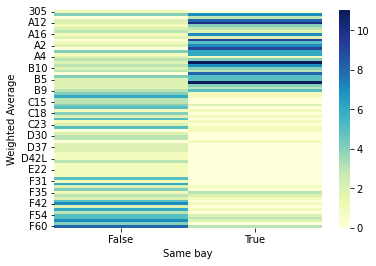

In [110]:
# plot the heatmap
sns.heatmap(ctab,cmap="YlGnBu") # annot=True, fmt="d"

# add labels
plt.xlabel("Same bay")
plt.ylabel("Weighted Average")

# show plot
plt.show()

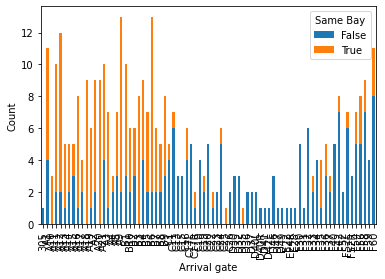

In [49]:
# plot the bar plot
ctab.plot(kind='bar', stacked=True)

# add labels
plt.xlabel("Arrival gate")
plt.ylabel("Count")

# show plot
plt.show()

In [69]:
# to csv
df_groupby.to_csv('Processed_data/SATS_Weighted_Average_and_Frequency.csv')

In [55]:
# pip install mosaicplot

In [56]:
# import mosaic
# # plot the mosaic plot
# mosaic.mosaic(df, ['Arrival gate', 'Same bay'])

# # show plot
# plt.show()
# # add labels
# plt.xlabel("Same bay")
# plt.ylabel("Arrival gate")

#### Mark same and different bay with 'True and False'

In [ ]:
# df_weighted_average['Same_Bay'] = (df_60['Arrival_Gate'].str[0].isin(['A','B']) & df_60['Dep_Gate'].str[0].isin(['A','B'])) | (df_60['Arrival_Gate'].str[0].isin(['C','D']) & df_60['Dep_Gate'].str[0].isin(['C','D'])) |(df_60['Arrival_Gate'].str[0].isin(['E','F']) & df_60['Dep_Gate'].str[0].isin(['E','F']))
# df_weighted_average.head()

,Arrival_Gate,Dep_Gate,Weighted_Average,Same_Bay
0,305,F42,0.000000,False
1,A1,A12,0.988068,True
2,A1,A14,0.829545,True
3,A1,A17,1.000000,True
4,A1,B1,1.000000,True
